In [1]:
import datetime

import geopandas as gpd
import pandas as pd
import sqlite3
import xgboost as xgb
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import predicting_unemployement
import numpy as np

In [2]:

def geoPaths()->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    return dc2.joinpath("data/unzipped/map")

mapDir = geoPaths()
barnetLSOA = mapDir.joinpath("barnet_lsoa.geojson")
barnet_map = gpd.read_file(barnetLSOA)
barnet_map= barnet_map[['geometry', 'lsoa11cd']]
barnet_map.rename(columns={'lsoa11cd': 'LSOA code'}, inplace=True)


In [4]:
def dbPath() -> Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    db = dc2.joinpath("data/database_final.db")
    return db


def modelPath(lsoaCode:str) ->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    modelPath = dc2.joinpath(f"data/models/{lsoaCode}.bin")
    return modelPath


In [5]:
df = predicting_unemployement.main()
df.rename(columns={"LSOA": "LSOA code"}, inplace=True)
df.head()

LOADING UNEMPLOYEMENT
UNEMPLOYEMENT LOADED


100%|██████████| 12/12 [00:05<00:00,  2.02it/s]


,LSOA code,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00
0,E01000115,5.020737,4.858058,5.119812,5.146266,5.249482,5.095469,5.152276,5.119569,5.152033,5.127775,5.119727,5.152276
1,E01000116,10.795442,10.264357,10.287848,8.674163,9.948874,10.395984,11.826907,11.609231,11.768168,11.678127,11.682132,12.213112
2,E01000117,15.448280,13.031735,14.528878,18.546827,17.885620,17.241240,16.080076,19.547098,18.590624,15.386317,15.855565,17.820406
3,E01000118,14.222237,17.214563,11.787148,17.653751,11.858356,13.747580,13.752280,13.744445,13.736516,12.540625,14.359941,13.292912
4,E01000119,11.344867,12.177163,10.591470,7.624488,6.422488,10.328675,8.491477,9.557648,10.605706,10.738141,10.426338,10.446950


In [6]:
# conn = sqlite3.connect(dbPath())
# query_unemployement = "SELECT * FROM montly_unemployement_claimant_count_by_lsoa_barnet"
# unemployement = pd.read_sql(query_unemployement, conn)
# unemployement = unemployement.rename(columns={"geogcode":"LSOA code"})
# unemployement.drop(columns=["index"], inplace=True)
# unemployement.dropna(inplace=True)
# unemployement["date"] = pd.to_datetime(unemployement["date"])
# singleMonth = unemployement[(unemployement["date"].dt.month==12)&(unemployement["date"].dt.year ==2014)]


In [7]:
# singleMonth.drop(columns=["index"], inplace=True);

In [8]:

merged = pd.merge(barnet_map, df, on=["LSOA code"])

In [9]:
merged.describe()

,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,18.985261,18.622960,19.227732,19.193263,19.335225,18.429071,18.985805,18.153802,18.371500,18.117337,17.691548,17.593290
std,10.999168,10.792552,11.731497,11.148279,11.469820,10.800515,11.367744,10.805433,10.788051,10.784057,10.390623,10.604343
min,0.021088,0.050587,0.030275,0.023226,0.012328,0.061129,0.022257,0.021022,0.056807,0.028931,0.021022,0.028668
25%,10.246894,10.242919,10.287848,10.314625,10.042048,10.065935,10.474387,9.900834,10.374314,9.932553,9.785534,9.604453
50%,17.546873,17.080690,17.202606,18.297527,17.400702,16.760880,16.760237,15.888656,16.982653,16.061659,16.123142,15.936525
75%,25.888773,25.868746,26.858612,26.945978,25.500507,25.033733,26.554844,25.823599,26.522722,25.519152,24.987511,24.421156
max,52.129517,48.288525,59.498779,55.281544,56.237808,64.694237,63.895412,51.500832,64.147926,57.980793,53.258823,62.135296


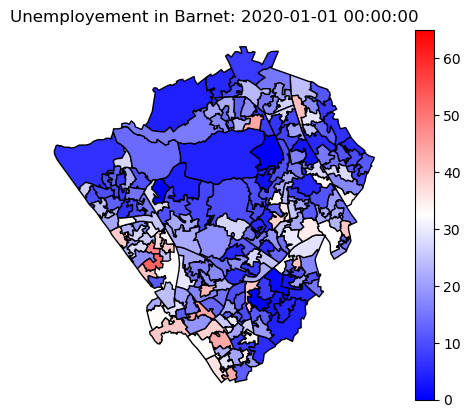

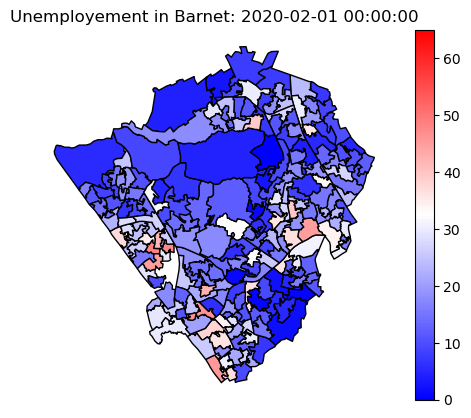

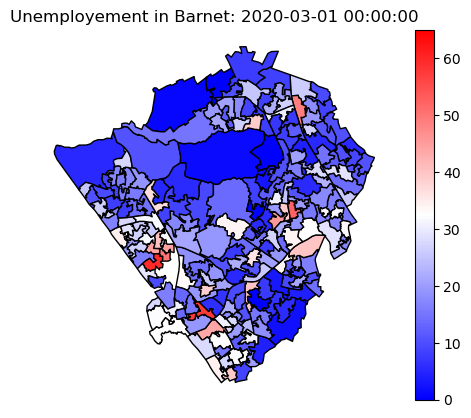

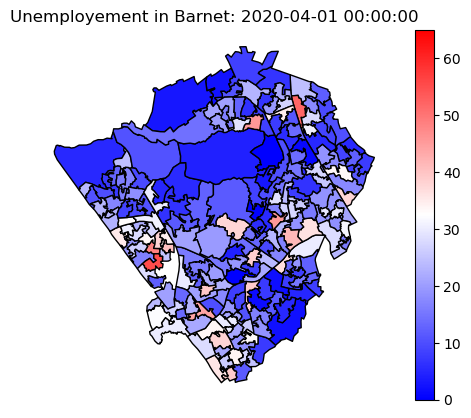

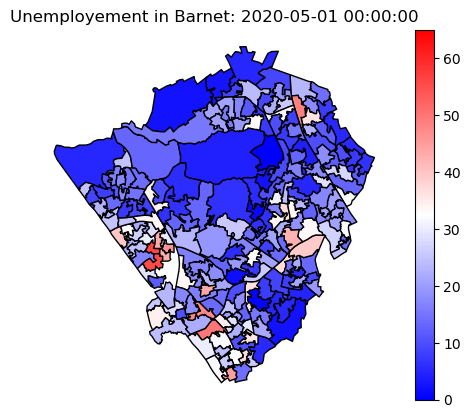

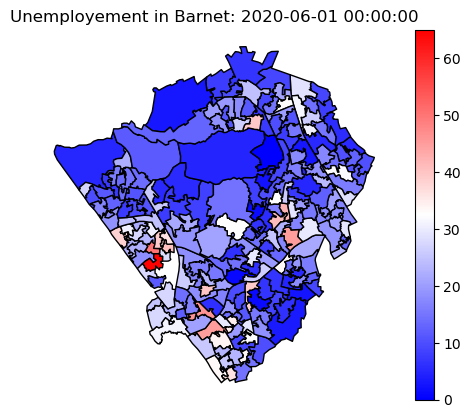

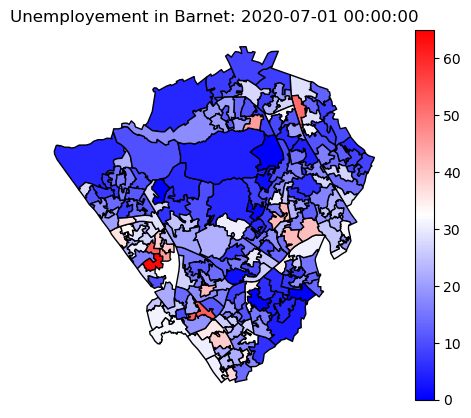

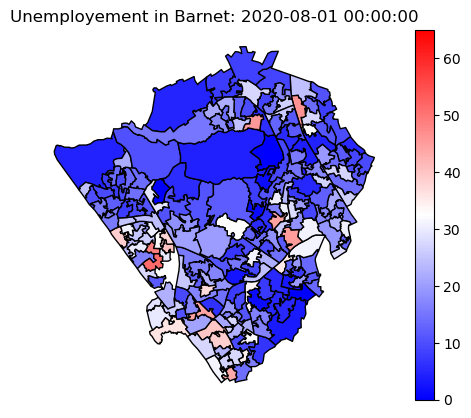

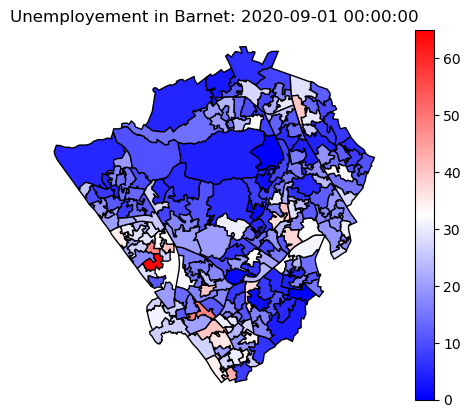

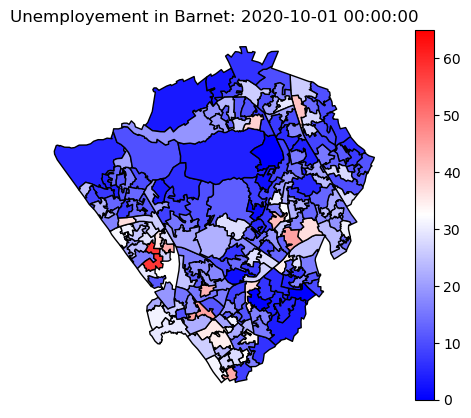

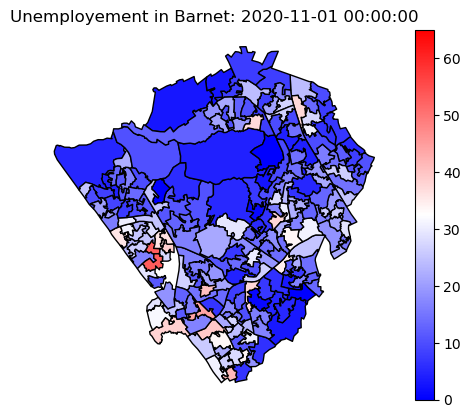

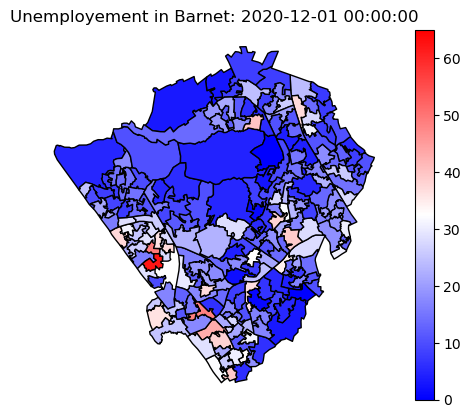

In [10]:
cwd = Path.cwd()
dc2 = cwd.parent
predGifDir = dc2.joinpath("data/img/predGif/")

cols = df.columns
month_dictionary = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
frames = []
cols = cols[1:]
for i, column in enumerate(cols):
    fig = merged.plot(column=column,cmap="bwr",edgecolors="black", vmin=0, vmax=65, legend=True, norm=plt.Normalize(vmin=0, vmax=65))
    fig.axis("off")
    fig.set_title(f"Unemployement in Barnet: {pd.to_datetime(column)}")
    chart = fig.get_figure()
    frames.append(predGifDir.joinpath(f"{i}_month_{month_dictionary[i+1]}.png"))
    chart.savefig(predGifDir.joinpath(f"{i}_month_{month_dictionary[i+1]}.png"), dpi=600)

# turn all these plots into a gif


In [11]:
from PIL import Image



# Create an empty list to store image frames
fs = []
# Open each image and append it to the frames list
for file in frames:
    image = Image.open(file)
    fs.append(image)

# Save the frames as an animated GIF
fs[0].save(predGifDir.joinpath('output.gif'), format='GIF', append_images=fs[1:], save_all=True, duration=1000, loop=0)


In [12]:
def dbPath() -> Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    db = dc2.joinpath("data/database_final.db")
    return db
def modelPath(lsoaCode:str) ->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    modelPath = dc2.joinpath(f"data/models/{lsoaCode}.bin")
    return modelPath


conn = sqlite3.connect(dbPath())
query_lsoa_codes = "SELECT geogcode FROM lsoa_code_to_name"
lsoa_codes = pd.read_sql(query_lsoa_codes, conn)

query_unemployement = "SELECT * FROM montly_unemployement_claimant_count_by_lsoa_barnet"
unemployement = pd.read_sql(query_unemployement, conn)

unemployement.dropna(inplace=True)
unemployement.drop(columns="index", inplace=True)
unemployement = unemployement[(unemployement["date"]<"2020") & (unemployement["date"]>"2012")]

unemployement = unemployement[unemployement["geogcode"]!="Column Total"].copy()
lsoa_code_list = lsoa_codes[lsoa_codes["geogcode"] != "Column Total"]["geogcode"].to_list()
allFeatures = pd.DataFrame(columns=lsoa_code_list, index=unemployement["date"].unique())

for row in tqdm(unemployement.index):
    allFeatures[unemployement["geogcode"][row]][unemployement["date"][row]] = unemployement["value"][row]

for code in tqdm(lsoa_code_list):
    for i in range(12):
        allFeatures[f"{code}_shift_{i+1}"] = allFeatures[f"{code}"].shift(i+1)

allFeatures = allFeatures.dropna()

code_out_shift = allFeatures[lsoa_code_list].copy()
code_with_shift = allFeatures.drop(lsoa_code_list, axis=True).copy()

  0%|          | 0/17724 [00:00<?, ?it/s]

  0%|          | 0/211 [00:00<?, ?it/s]

/tmp/ipykernel_20365/471615119.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  allFeatures[f"{code}_shift_{i+1}"] = allFeatures[f"{code}"].shift(i+1)
/tmp/ipykernel_20365/471615119.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  allFeatures[f"{code}_shift_{i+1}"] = allFeatures[f"{code}"].shift(i+1)
/tmp/ipykernel_20365/471615119.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

In [13]:
len(code_with_shift.index)

72

In [30]:
pred = {}
final = pd.DataFrame(columns=code_with_shift.index, index=lsoa_code_list)
for row in tqdm(code_with_shift.index):
    pred = [pd.DataFrame({"LSOA": lsoa_code_list})]
    guessList = np.empty(len(lsoa_code_list))
    for i, code in enumerate(lsoa_code_list):
        model = xgb.XGBRegressor()
        model.load_model(modelPath(code))
        final[row][code] = model.predict(code_with_shift.loc[row].values.reshape(1, -1))[0]




  0%|          | 0/72 [00:00<?, ?it/s]

In [31]:
final

,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,...,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
E01000115,10.000177,10.000177,10.000177,9.999981,10.000051,10.002335,10.021601,10.023178,10.278227,14.999632,...,5.000165,5.000581,9.999584,10.000435,9.999735,10.253292,9.99963,10.000011,10.000011,10.000011
E01000116,15.000105,14.999807,12.216262,14.999437,11.213925,10.000377,10.000012,9.999766,10.817712,9.6269,...,9.675158,9.999946,10.00009,4.999815,10.000665,9.999691,5.000193,5.000135,9.759652,9.999968
E01000117,19.999786,17.121546,15.000523,14.785814,15.00004,20.783548,19.999935,24.999445,23.544577,25.000158,...,15.000405,20.000288,19.999369,19.999838,15.000117,14.938772,15.00031,15.000133,15.000261,14.999763
E01000118,19.999878,24.999937,20.000196,19.999935,18.83534,19.999752,15.242975,15.000304,15.000253,17.098675,...,20.035143,24.999773,19.999872,20.000244,19.999887,19.506226,15.000401,19.999828,20.000235,19.999861
E01000119,15.000233,19.998859,14.99984,15.00016,10.00059,9.999815,13.005196,9.999664,5.000179,5.000379,...,9.999354,9.999949,10.31355,13.833314,10.0005,10.000012,10.000541,13.672009,15.000157,14.999753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E01000322,20.000172,20.387749,20.000719,20.000048,21.388996,20.820396,29.999849,22.835638,24.999802,23.903715,...,20.000181,24.999939,26.446608,30.000059,32.836853,34.998714,24.99987,20.00058,19.999727,20.00013
E01000323,25.000296,29.999893,29.467598,29.299446,29.999805,25.000195,29.999029,29.171484,25.000164,20.000662,...,60.000118,64.999893,69.999657,69.783569,70.000061,69.999863,64.999962,64.999901,65.000366,69.999535
E01000324,24.503157,20.000614,19.999929,20.000038,19.999956,19.999851,19.999767,19.999979,20.000294,19.736135,...,14.999791,14.999866,15.000633,19.999912,24.998636,20.000286,19.91441,19.378614,19.934631,19.192707
E01033572,34.999935,35.000065,35.000607,34.999981,34.999889,35.000076,34.999641,20.000492,22.819439,30.331051,...,54.999916,60.000778,65.000122,74.999626,64.999924,69.999809,65.000298,69.999847,65.000076,74.999283


In [15]:
cwd = Path.cwd()
dc2 = cwd.parent
gifDir = dc2.joinpath("data/img/gif/")
month_dictionary = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}


for intMonth in range(1,13):
    singleFrame = unemployement[(unemployement["date"].dt.month==1)&(unemployement["date"].dt.year ==2014)]
    merged = pd.merge(barnet_map, singleMonth, on=["LSOA code"])
    fig = merged.plot(column="value",cmap="Blues", vmin=0, vmax=65, legend=True, norm=plt.Normalize(vmin=0, vmax=65))
    fig.axis("off")
    fig.set_title(f"Unemployement in Barnet: {month_dictionary[intMonth]}, 2014")
    chart = fig.get_figure()
    frames.append(gifDir.joinpath(f"month_{intMonth}.svg"), dpi=450)
    chart.savefig(gifDir.joinpath(f"month_{intMonth}.svg"), dpi=450)


AttributeError: Can only use .dt accessor with datetimelike values